<a href="https://colab.research.google.com/github/pooja195manjunath/Machine-Learning-/blob/main/1bm22cs195_Lab4__linear_multi_logistic_regs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression

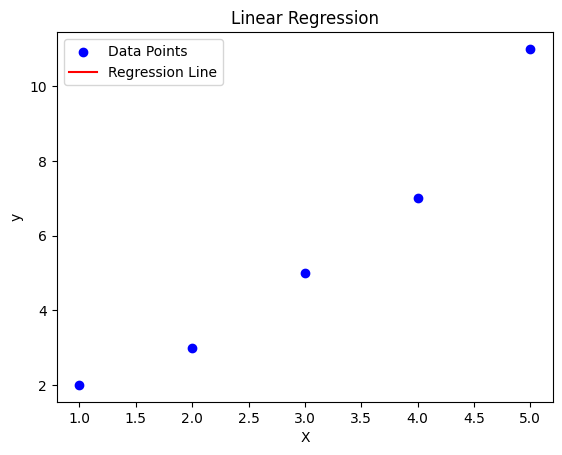

Coefficients: [2.14285714]
Intercept: -0.7142857142857126


In [ ]:
# Linear Regression Example

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sample data
data = {
    'X': [1, 2, 3, 4, 5],
    'y': [2, 3, 5, 7, 11]
}
df = pd.DataFrame(data)

# Splitting the data
X = df[['X']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plotting
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Multiple Regression

In [ ]:
# Multiple Regression Example

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sample data
data = {
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 3, 4, 5, 6],
    'y': [2, 3, 5, 7, 11]
}
df = pd.DataFrame(data)

# Splitting the data
X = df[['X1', 'X2']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [1.07142857 1.07142857]
Intercept: -1.7857142857142865


Logistic regression

In [ ]:
# Logistic Regression Example

# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Sample data
data = {
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X2': [2, 1, 2, 3, 5, 6, 7, 8, 9, 10],
    'y': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Splitting the data
X = df[['X1', 'X2']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


Iteration = 1, Loss = 4555.717141960952
Iteration = 1, Loss = 555.8917874189143
Iteration = 1, Loss = 73.86930343512178
Iteration = 1, Loss = 15.780348420752416
Iteration = 2, Loss = 8.779997173412934
Iteration = 3, Loss = 7.936378660117342
Iteration = 4, Loss = 7.834713442929137
Iteration = 5, Loss = 7.8224616723509595
Iteration = 6, Loss = 7.820985195146357
Iteration = 7, Loss = 7.820807258057723
Iteration = 8, Loss = 7.820785809185198
Iteration = 9, Loss = 7.820783218846275
Iteration = 10, Loss = 7.8207829011664405
Iteration = 11, Loss = 7.8207828573673135
Iteration = 12, Loss = 7.820782846574347
Iteration = 13, Loss = 7.8207828397595405
Iteration = 14, Loss = 7.8207828334246985
Iteration = 15, Loss = 7.820782827148256
Iteration = 16, Loss = 7.820782820879404
Iteration = 17, Loss = 7.82078281461202
Iteration = 18, Loss = 7.8207828083453705
Iteration = 19, Loss = 7.820782802079366
Iteration = 20, Loss = 7.820782795813992


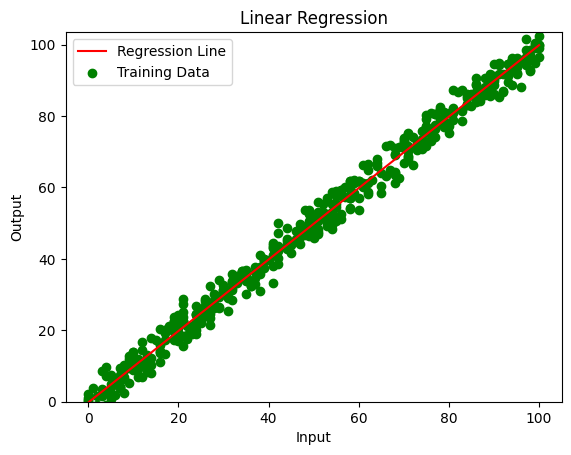

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation
url = "/content/data_for_lr.csv"
data = pd.read_csv(url)
data

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        # dm= 2/n * mean of (predictions-actual) * input
        dm = 2 * np.mean(np.multiply(train_input, df))
        # dc = 2/n * mean of (predictions-actual)
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        # Initialize random parameters
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss
        self.loss = []

        # Initialize figure and axis for animation
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o',
                color='green', label='Training Data')

        # Set y-axis limits to exclude negative values
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            # Forward propagation
            predictions = self.forward_propagation(train_input)

            # Cost function
            cost = self.cost_function(predictions, train_output)

            # Back propagation
            derivatives = self.backward_propagation(
                train_input, train_output, predictions)

            # Update parameters
            self.update_parameters(derivatives, learning_rate)

            # Update the regression line
            line.set_ydata(self.parameters['m']
                        * x_vals + self.parameters['c'])

            # Append loss and print
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))

            return line,
        # Create animation
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        # Save the animation as a video file (e.g., MP4)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

